In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# your Twitter API key and API secret & Microsoft Azure API Credentials
consumerKey = os.getenv("twitter_api_key")
consumerSecret = os.getenv("twitter_secret_api_key")
accessToken = os.getenv("twitter_access")
accessTokenSecret = os.getenv("twitter_access_secret")

# authenticate
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#Sentiment Analysis
def  percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  #nasdaq
Please enter how many tweets to analyze:  15


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  15
positive number:  4
negative number:  1
neutral number:  10


In [5]:
tweet_list

,0
0,NQ100 BUY @ 16093\nTP1 : 16110\nTp2 :16 130\nT...
1,RT @TradersCom: Join us as we go through globa...
2,$MSK new alert at https://t.co/A7qrDarJHY #s...
3,"Ben gerçekçiyim, noelden önce geçmesi gerekir ..."
4,@pm1889 Yes I’m short more #dow and #nasdaq bu...
5,RT @GoodInvest82: #Coronavirus: #Omicron in th...
6,RT @wallaceholdings: $NXMH you better believe ...
7,#NASDAQ #Fx #Forex #HarmonicTrading https://t....
8,【株価指数】\n2021年12月7日17時45分時点\n\nS&amp;P500:4591....
9,#Coronavirus: #Omicron in the #UK will become ...


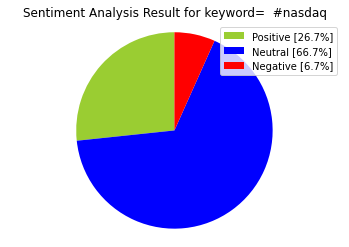

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
#columns= ["pos", "neu", "neg"]

In [8]:
#sizes = [positive, neutral, negative]

In [9]:
#x=pd.DataFrame(sizes, columns)

In [10]:
x = pd.DataFrame({"pos": [positive],
                   "neu": [neutral],
                   "neg": [negative]},
                  index=[keyword])

In [11]:
x.head()

,pos,neu,neg
#nasdaq,26.7,66.7,6.7
